In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
life_df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Iran (Islamic Republic of),NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [5]:
# percent of empty entries in each column
life_df.isnull().sum()/life_df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [14]:
# using pandas interpolation function to fill missing values
fill_cols = life_df.columns[life_df.isnull().sum() > 0]
countries = life_df['Country'].unique()

# save empty enteries stats
before_inter = (life_df.isnull().sum()/life_df.shape[0]*100).values

for country in countries:
    life_df.loc[life_df['Country'] == country, fill_cols] = life_df.loc[life_df['Country'] == country, fill_cols].interpolate(method='linear', limit_direction='both')

# print percent of empty cells before and after imputation
after_inter = (life_df.isnull().sum()/life_df.shape[0]*100).values
inter_ind = (life_df.isnull().sum()/life_df.shape[0]*100).index
print('{0:<30}      {1:<12}      {2:<12}'.format('', 'before', 'after')) 
for row in zip(inter_ind, before_inter, after_inter):
    print('{0:<30}      {1:<15.3}      {2:<15.3}'.format(*row))   

                                    before            after       
Country                             0.0                  0.0            
Year                                0.0                  0.0            
Status                              0.0                  0.0            
Life expectancy                     0.34                 0.34           
Adult Mortality                     0.34                 0.34           
infant deaths                       0.0                  0.0            
Alcohol                             6.54                 0.579          
percentage expenditure              0.0                  0.0            
Hepatitis B                         4.9                  4.9            
Measles                             0.0                  0.0            
 BMI                                1.16                 1.16           
under-five deaths                   0.0                  0.0            
Polio                               0.0                  

In [15]:
# drop empty rows that cannot be interpolated
life_df.dropna(inplace=True)
life_df.isnull().sum()/life_df.shape[0]*100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [16]:
life_df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128,2128.000000,2128,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Netherlands,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.500000,NaN,68.139709,174.300282,35.902726,4.348240,640.072009,74.270207,2657.467105,...,80.335996,5.899370,80.477444,2.173637,5402.417263,1.339761e+07,5.107895,5.177538,0.607481,11.691823
std,NaN,4.610856,NaN,9.610700,129.759274,136.224732,3.998403,1710.798798,28.796545,11912.236064,...,24.494233,2.305911,24.478990,5.827273,11376.222749,6.315772e+07,4.711951,4.805378,0.203404,3.203263
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.750000,NaN,62.000000,76.000000,1.000000,0.590000,19.883256,64.000000,0.000000,...,74.000000,4.357500,76.000000,0.100000,393.276186,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,NaN,2007.500000,NaN,69.950000,152.000000,4.000000,3.600000,83.677991,87.000000,20.000000,...,91.000000,5.790000,91.000000,0.100000,1353.159574,1.425337e+06,3.400000,3.400000,0.649500,11.900000
75%,NaN,2011.250000,NaN,74.800000,241.250000,24.000000,7.115000,431.365149,95.000000,459.250000,...,96.000000,7.390000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000


In [ ]:
# make histograms for all numerical variables and take care of outliers (log transform and test normality)
# Calculate correlation matrix (can this be color coded?)
#     corr = df.corr()
#     corr.style.background_gradient(cmap='coolwarm')
# PCA and PCA variable contribution to choose variables
# Choose longevity cutoff and make target categorial so LDA can be applied
# Visualization? scatter graphs where the longevity countris cluster by the dimensions? barplots where the
# longevity countries are significantly different than the rest of the population?

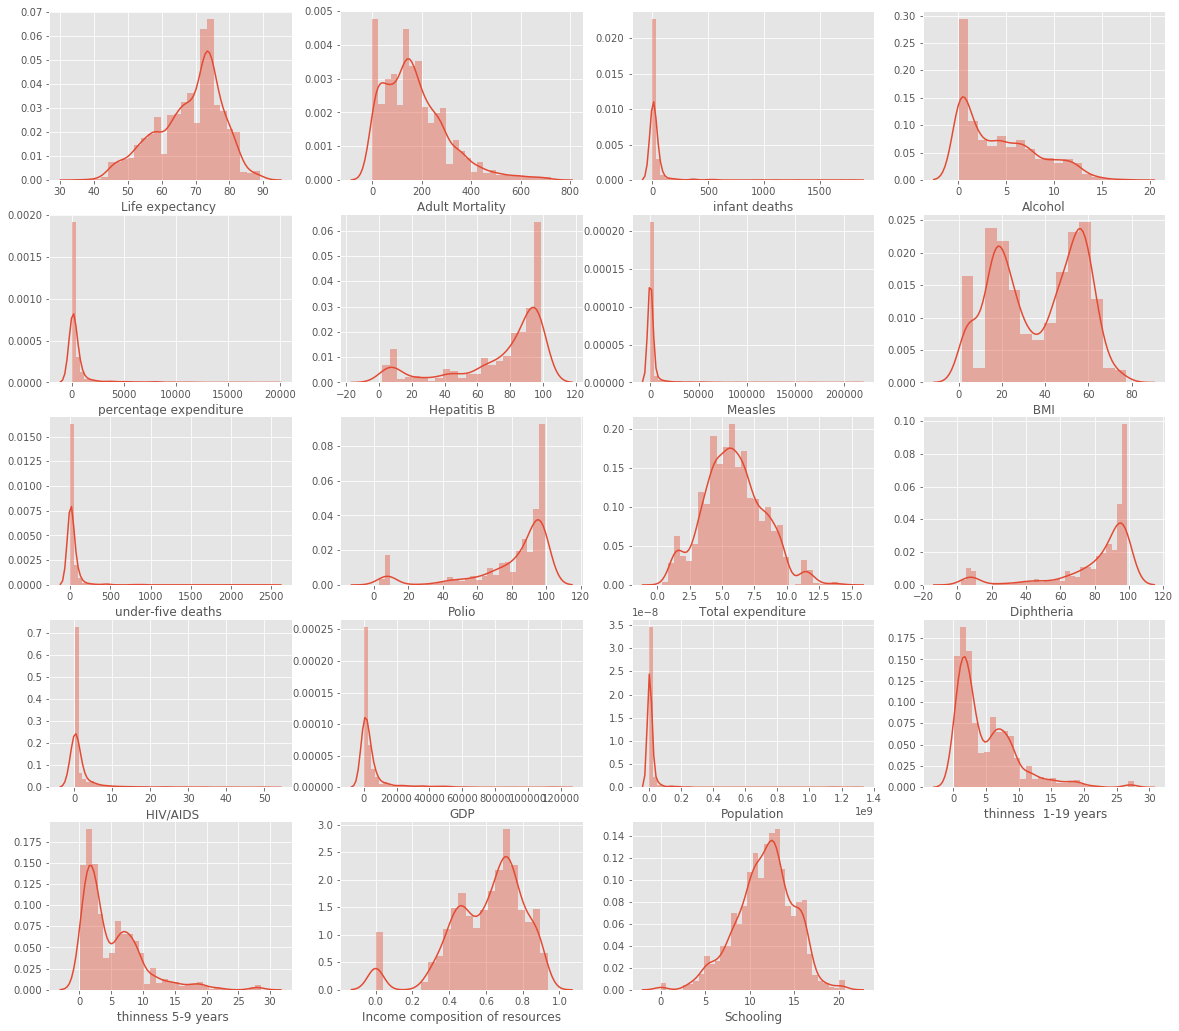

In [49]:
hist_cols = life_df.columns[3:]
# should check normality and plot those variables that are not normaly distributed

plt.figure(figsize=(20, 18))

for i in range(1, len(hist_cols)+1):
    plt.subplot(5,4,i)
    sns.distplot(life_df[hist_cols[i-1]])

plt.show()